In [1]:
import os
from shutil import copy2
import csv

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow_hub as hub
import pandas as pd

In [4]:
tf.__version__

'2.3.1'

In [5]:
# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [6]:
data_root = "../dataset/AWEDataset/awe-train"

In [27]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = "/".join([data_root, "train"])
VALIDATE_DATA_DIR = "/".join([data_root, "val"])
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      brightness_range=[0.5, 1.5],
      horizontal_flip=False,
      vertical_flip=False,
      fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    VALIDATE_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 100 images belonging to 100 classes.
Found 800 images belonging to 100 classes.


In [28]:
for image_batch, label_batch in train_generator:
      break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 100))

In [29]:
# label_batch

In [30]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
      f.write(labels)

print (valid_generator.class_indices)
labels = '\n'.join(sorted(valid_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
      f.write(labels)

{'001': 0, '002': 1, '003': 2, '004': 3, '005': 4, '006': 5, '007': 6, '008': 7, '009': 8, '010': 9, '011': 10, '012': 11, '013': 12, '014': 13, '015': 14, '016': 15, '017': 16, '018': 17, '019': 18, '020': 19, '021': 20, '022': 21, '023': 22, '024': 23, '025': 24, '026': 25, '027': 26, '028': 27, '029': 28, '030': 29, '031': 30, '032': 31, '033': 32, '034': 33, '035': 34, '036': 35, '037': 36, '038': 37, '039': 38, '040': 39, '041': 40, '042': 41, '043': 42, '044': 43, '045': 44, '046': 45, '047': 46, '048': 47, '049': 48, '050': 49, '051': 50, '052': 51, '053': 52, '054': 53, '055': 54, '056': 55, '057': 56, '058': 57, '059': 58, '060': 59, '061': 60, '062': 61, '063': 62, '064': 63, '065': 64, '066': 65, '067': 66, '068': 67, '069': 68, '070': 69, '071': 70, '072': 71, '073': 72, '074': 73, '075': 74, '076': 75, '077': 76, '078': 77, '079': 78, '080': 79, '081': 80, '082': 81, '083': 82, '084': 83, '085': 84, '086': 85, '087': 86, '088': 87, '089': 88, '090': 89, '091': 90, '092': 9

In [32]:
x, y = next(train_generator)

In [33]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math

In [34]:
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        if show_labels:
            ax.set_title(str(np.argmax(label_list[i])))
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')


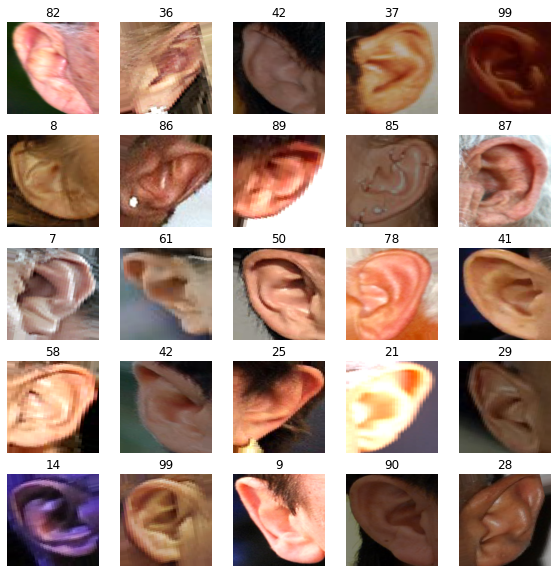

In [36]:
show_grid(x,5,5,label_list=y,show_labels=True,figsize=(20,10), savename="ear-augment-4.png")